In [1]:
# Cell 1: Setup and Learning Context
"""
ADVANCED EDA: Challenge Dataset Analysis

LEARNING GOALS:
1. Understand what makes recommendation tasks hard vs easy
2. Identify which algorithms work best for which scenarios
3. Map business requirements to technical approaches

RECOMMENDER SYSTEMS THEORY:
- Cold start problem: Recommending with little/no user data
- Content vs Collaborative filtering trade-offs
- Title-based vs behavior-based signals

Let's discover these concepts through data exploration!
"""

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🎯 Challenge Dataset Analysis - Learning Recommender Systems")
print("=" * 60)

🎯 Challenge Dataset Analysis - Learning Recommender Systems


In [6]:
# Cell 2: Load and Inspect Challenge Data
"""
FIRST PRINCIPLE: Always inspect your data structure first
- What fields are available?
- How is the data organized?
- What's the relationship between provided vs missing data?
"""

def load_challenge_data(file_path):
    """Load challenge dataset with detailed inspection"""
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    print(f"📅 Dataset generated: {data.get('date')}")
    print(f"📋 Version: {data.get('version')}")
    print(f"🎵 Total playlists: {len(data['playlists']):,}")
    
    return data['playlists']

# Load data (update path as needed)
challenge_playlists = load_challenge_data('../../data/challenge/challenge_set.json')

# Inspect first playlist structure
sample_playlist = challenge_playlists[10]
print("\n🔍 Sample Playlist Structure:")
print(f"Keys available: {list(sample_playlist.keys())}")
print(f"PID: {sample_playlist['pid']}")
print(f"Name: '{sample_playlist.get('name', 'NO TITLE')}'")
print(f"Tracks provided: {sample_playlist['num_samples']}")
print(f"Tracks missing: {sample_playlist['num_holdouts']}")
print(f"Total tracks: {sample_playlist['num_tracks']}")

📅 Dataset generated: 2018-01-16 08:47:28.198015
📋 Version: v1
🎵 Total playlists: 10,000

🔍 Sample Playlist Structure:
Keys available: ['name', 'num_holdouts', 'pid', 'num_tracks', 'tracks', 'num_samples']
PID: 1000017
Name: 'dance playlist'
Tracks provided: 0
Tracks missing: 18
Total tracks: 18


Above show there's Cold Start Problem

- Content-Based Filtering is Essential
- Popularity Bias Will Be Important
- Title Analysis is Critical (Semantic: NLP analysis of 'dance' concept") 

In [4]:
# Cell 3: Challenge Category Analysis
"""
CORE CONCEPT: Different recommendation scenarios require different approaches

THEORY BREAKDOWN:
1. Title-only → Pure content-based or popularity-based
2. Few seed tracks → Collaborative filtering challenges
3. Many seed tracks → Rich behavioral data available
4. No title → Must rely entirely on track patterns

Let's categorize and understand each scenario...
"""

def categorize_challenge_playlists(playlists):
    """
    Categorize playlists by the challenge type
    This teaches us about different recommendation scenarios
    """
    
    categories = {
        'title_only': [],           # Pure cold start
        'title_1_track': [],        # Minimal signal
        'title_5_tracks': [],       # Some collaborative signal
        'no_title_5_tracks': [],    # Behavior-only signal
        'title_10_tracks': [],      # Good collaborative signal
        'no_title_10_tracks': [],   # Rich behavior, no content
        'title_25_tracks': [],      # Rich signal
        'title_100_tracks': [],     # Very rich signal
        'other': []                 # Edge cases
    }
    
    for playlist in playlists:
        num_samples = playlist['num_samples']
        has_title = 'name' in playlist and playlist['name'].strip() != ''
        
        # Categorization logic
        if num_samples == 0:
            categories['title_only'].append(playlist)
        elif num_samples == 1 and has_title:
            categories['title_1_track'].append(playlist)
        elif num_samples == 5 and has_title:
            categories['title_5_tracks'].append(playlist)
        elif num_samples == 5 and not has_title:
            categories['no_title_5_tracks'].append(playlist)
        elif num_samples == 10 and has_title:
            categories['title_10_tracks'].append(playlist)
        elif num_samples == 10 and not has_title:
            categories['no_title_10_tracks'].append(playlist)
        elif num_samples == 25 and has_title:
            categories['title_25_tracks'].append(playlist)
        elif num_samples == 100 and has_title:
            categories['title_100_tracks'].append(playlist)
        else:
            categories['other'].append(playlist)
    
    return categories

# Categorize playlists
categories = categorize_challenge_playlists(challenge_playlists)

# Analyze each category
print("📊 CHALLENGE CATEGORY ANALYSIS")
print("=" * 50)

for cat_name, playlists in categories.items():
    if playlists:
        print(f"\n🎯 {cat_name.upper().replace('_', ' ')}: {len(playlists):,} playlists")
        
        # Calculate statistics
        holdouts = [p['num_holdouts'] for p in playlists]
        print(f"   Tracks to predict: {np.mean(holdouts):.1f} (avg), {min(holdouts)}-{max(holdouts)} (range)")
        
        # Sample playlist
        sample = playlists[0]
        print(f"   Example: '{sample.get('name', 'NO TITLE')}' (PID: {sample['pid']})")

📊 CHALLENGE CATEGORY ANALYSIS

🎯 TITLE ONLY: 1,000 playlists
   Tracks to predict: 28.6 (avg), 10-50 (range)
   Example: 'spanish playlist' (PID: 1000002)

🎯 TITLE 1 TRACK: 1,000 playlists
   Tracks to predict: 22.8 (avg), 9-77 (range)
   Example: 'Comedy' (PID: 1002313)

🎯 TITLE 5 TRACKS: 1,000 playlists
   Tracks to predict: 53.4 (avg), 5-95 (range)
   Example: 'Party' (PID: 1000000)

🎯 NO TITLE 5 TRACKS: 1,000 playlists
   Tracks to predict: 58.1 (avg), 35-95 (range)
   Example: 'NO TITLE' (PID: 1003478)

🎯 TITLE 10 TRACKS: 1,000 playlists
   Tracks to predict: 53.6 (avg), 30-90 (range)
   Example: 'Fix You' (PID: 1007133)

🎯 NO TITLE 10 TRACKS: 1,000 playlists
   Tracks to predict: 53.7 (avg), 30-90 (range)
   Example: 'NO TITLE' (PID: 1010764)

🎯 TITLE 25 TRACKS: 2,000 playlists
   Tracks to predict: 126.0 (avg), 76-225 (range)
   Example: 'Oldies' (PID: 1000001)

🎯 TITLE 100 TRACKS: 2,000 playlists
   Tracks to predict: 88.4 (avg), 50-150 (range)
   Example: 'April' (PID: 1010382

### Title-Only

TITLE ONLY: 1,000 playlists
- Predict: 28.6 tracks average (10-50 range)
- Example: 'spanish playlist'

Insight: Moderate prediction task with strong semantic signal

* "spanish" = clear genre/language indicator

* 28 tracks = substantial but manageable prediction size

* Strategy: Content-based filtering + popularity in Spanish music


### Minimal Behavioral Signal

TITLE 1 TRACK: 1,000 playlists  
- Predict: 22.8 tracks average (9-77 range)
- Example: 'Comedy'

Insight: Interesting title + one track to analyze

- "Comedy" = unusual playlist title (podcast? funny songs?)
- 22 tracks = smaller prediction task than title-only
- Strategy: Analyze the one seed track + title semantics


### Light Collaborative Filtering

TITLE 5 TRACKS: 1,000 playlists
- Predict: 53.4 tracks average (5-95 range)  
- Example: 'Party'

NO TITLE 5 TRACKS: 1,000 playlists
- Predict: 58.1 tracks average (35-95 range)


- With title: 53.4 tracks to predict
- Without title: 58.1 tracks to predict
- Insight: Titles help! Having "Party" as context makes the task slightly easier


### Moderate Collaborative Filtering

TITLE 10 TRACKS: 1,000 playlists
- Predict: 53.6 tracks average (30-90 range)
- Example: 'Fix You'

NO TITLE 10 TRACKS: 1,000 playlists  
- Predict: 53.7 tracks average (30-90 range)

Insight: Titles become less important with more behavioral data!

- Nearly identical prediction sizes (53.6 vs 53.7)
- 10 tracks provide enough behavioral signal that title matters less
- "Fix You" = specific song title as playlist name (emotional/mood indicator)


### Rich Signal Categories

TITLE 25 TRACKS: 2,000 playlists
- Predict: 126.0 tracks average (76-225 range)
- Example: 'Oldies'

TITLE 100 TRACKS: 2,000 playlists
- Predict: 88.4 tracks average (50-150 range)  
- Example: 'April'



Easiest → Hardest:
100 tracks > 25 tracks > 10 tracks (no title) ≈ 10 tracks (title) > 
5 tracks (title) > 5 tracks (no title) > 1 track + title > title only

In [7]:
# Cell 4: Difficulty Analysis - Learning Recommendation Challenges
"""
LEARNING CONCEPT: Recommendation Difficulty Factors

FACTORS THAT MAKE RECOMMENDATIONS HARD:
1. Cold start: No user history
2. Sparsity: Few seed tracks  
3. No content signals: Missing titles/metadata
4. Large prediction space: Many tracks to predict

Let's quantify difficulty across categories...
"""

def analyze_recommendation_difficulty(categories):
    """
    Analyze what makes each category challenging
    This teaches us about real-world recommendation problems
    """
    
    difficulty_analysis = {}
    
    for cat_name, playlists in categories.items():
        if not playlists:
            continue
            
        # Difficulty factors
        num_samples = [p['num_samples'] for p in playlists]
        num_holdouts = [p['num_holdouts'] for p in playlists]
        has_titles = [bool(p.get('name', '').strip()) for p in playlists]
        
        # Calculate difficulty scores
        avg_samples = np.mean(num_samples)
        avg_holdouts = np.mean(num_holdouts)
        title_percentage = np.mean(has_titles) * 100
        
        # Simple difficulty heuristic (lower = harder)
        # More samples = easier, more holdouts = harder, titles = easier
        difficulty_score = (avg_samples * 2) + (title_percentage / 10) - (avg_holdouts / 10)
        
        difficulty_analysis[cat_name] = {
            'avg_samples': avg_samples,
            'avg_holdouts': avg_holdouts,
            'title_percentage': title_percentage,
            'difficulty_score': difficulty_score,
            'count': len(playlists)
        }
    
    return difficulty_analysis

difficulty_scores = analyze_recommendation_difficulty(categories)

# Sort by difficulty (lowest score = hardest)
sorted_difficulties = sorted(difficulty_scores.items(), 
                           key=lambda x: x[1]['difficulty_score'])

print("🎯 RECOMMENDATION DIFFICULTY RANKING")
print("=" * 50)
print("(Hardest to Easiest)")

for i, (cat_name, stats) in enumerate(sorted_difficulties, 1):
    print(f"\n{i}. {cat_name.replace('_', ' ').title()}")
    print(f"   Samples: {stats['avg_samples']:.1f} | Holdouts: {stats['avg_holdouts']:.1f}")
    print(f"   Has titles: {stats['title_percentage']:.0f}% | Difficulty: {stats['difficulty_score']:.1f}")


🎯 RECOMMENDATION DIFFICULTY RANKING
(Hardest to Easiest)

1. No Title 5 Tracks
   Samples: 5.0 | Holdouts: 58.1
   Has titles: 0% | Difficulty: 4.2

2. Title Only
   Samples: 0.0 | Holdouts: 28.6
   Has titles: 100% | Difficulty: 7.1

3. Title 1 Track
   Samples: 1.0 | Holdouts: 22.8
   Has titles: 100% | Difficulty: 9.7

4. No Title 10 Tracks
   Samples: 10.0 | Holdouts: 53.7
   Has titles: 0% | Difficulty: 14.6

5. Title 5 Tracks
   Samples: 5.0 | Holdouts: 53.4
   Has titles: 100% | Difficulty: 14.7

6. Title 10 Tracks
   Samples: 10.0 | Holdouts: 53.6
   Has titles: 100% | Difficulty: 24.6

7. Title 25 Tracks
   Samples: 25.0 | Holdouts: 126.0
   Has titles: 100% | Difficulty: 47.4

8. Title 100 Tracks
   Samples: 100.0 | Holdouts: 88.4
   Has titles: 100% | Difficulty: 201.2


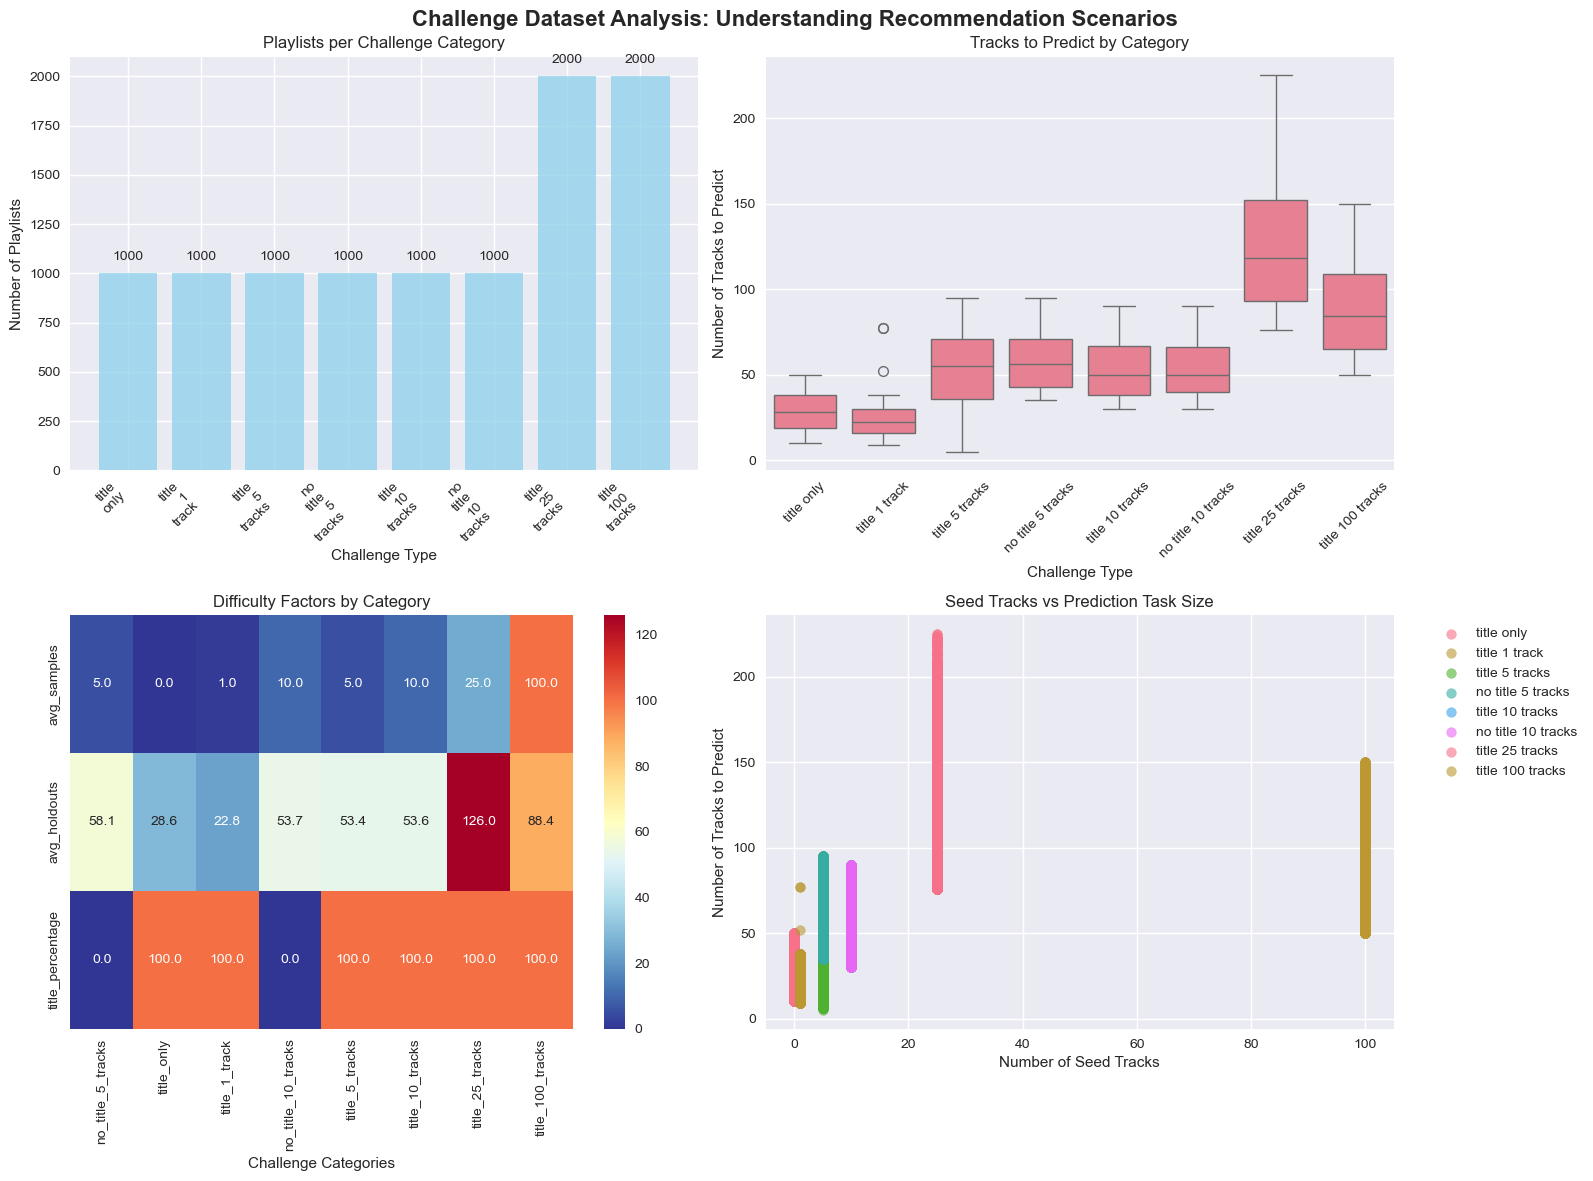

In [8]:
# Cell 5: Visualization - Understanding Challenge Distribution
"""
LEARNING GOAL: Visualize recommendation challenges
Data visualization helps us understand problem complexity
"""

# Create comprehensive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Challenge Dataset Analysis: Understanding Recommendation Scenarios', 
             fontsize=16, fontweight='bold')

# Plot 1: Category distribution
categories_clean = {k: v for k, v in categories.items() if v}
cat_names = list(categories_clean.keys())
cat_counts = [len(v) for v in categories_clean.values()]

bars1 = ax1.bar(range(len(cat_names)), cat_counts, color='skyblue', alpha=0.7)
ax1.set_title('Playlists per Challenge Category')
ax1.set_xlabel('Challenge Type')
ax1.set_ylabel('Number of Playlists')
ax1.set_xticks(range(len(cat_names)))
ax1.set_xticklabels([name.replace('_', '\n') for name in cat_names], rotation=45, ha='right')

# Add count labels
for bar, count in zip(bars1, cat_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{count}', ha='center', va='bottom')

# Plot 2: Prediction task size
holdouts_by_category = []
cat_labels = []
for cat_name, playlists in categories_clean.items():
    holdouts = [p['num_holdouts'] for p in playlists]
    holdouts_by_category.extend(holdouts)
    cat_labels.extend([cat_name.replace('_', ' ')] * len(holdouts))

# Box plot of holdouts by category
holdouts_df = pd.DataFrame({
    'category': cat_labels,
    'holdouts': holdouts_by_category
})

sns.boxplot(data=holdouts_df, x='category', y='holdouts', ax=ax2)
ax2.set_title('Tracks to Predict by Category')
ax2.set_xlabel('Challenge Type')
ax2.set_ylabel('Number of Tracks to Predict')
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Difficulty heatmap
if difficulty_scores:
    diff_df = pd.DataFrame(difficulty_scores).T
    diff_df = diff_df.sort_values('difficulty_score')
    
    # Create heatmap of difficulty factors
    heatmap_data = diff_df[['avg_samples', 'avg_holdouts', 'title_percentage']].T
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlBu_r', ax=ax3)
    ax3.set_title('Difficulty Factors by Category')
    ax3.set_xlabel('Challenge Categories')

# Plot 4: Sample vs Holdout relationship
all_samples = []
all_holdouts = []
all_categories = []

for cat_name, playlists in categories_clean.items():
    for playlist in playlists:
        all_samples.append(playlist['num_samples'])
        all_holdouts.append(playlist['num_holdouts'])
        all_categories.append(cat_name)

scatter_df = pd.DataFrame({
    'samples': all_samples,
    'holdouts': all_holdouts,
    'category': all_categories
})

for cat in scatter_df['category'].unique():
    cat_data = scatter_df[scatter_df['category'] == cat]
    ax4.scatter(cat_data['samples'], cat_data['holdouts'], 
               label=cat.replace('_', ' '), alpha=0.6)

ax4.set_xlabel('Number of Seed Tracks')
ax4.set_ylabel('Number of Tracks to Predict')
ax4.set_title('Seed Tracks vs Prediction Task Size')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [9]:
# Cell 6: Sample Playlist Deep Dive
"""
LEARNING CONCEPT: Understanding Input Data Quality

REAL-WORLD INSIGHT: The quality and characteristics of seed data
determines which recommendation algorithms will work best.

Let's examine actual examples from each category...
"""

def analyze_sample_playlists(categories, n_samples=2):
    """
    Deep dive into sample playlists from each category
    This teaches us about real recommendation inputs
    """
    
    print("🎵 SAMPLE PLAYLIST ANALYSIS")
    print("=" * 60)
    
    for cat_name, playlists in categories.items():
        if not playlists:
            continue
            
        print(f"\n🎯 {cat_name.upper().replace('_', ' ')}")
        print("-" * 40)
        
        # Show sample playlists
        samples = playlists[:n_samples]
        
        for i, playlist in enumerate(samples, 1):
            print(f"\n   Sample {i}:")
            print(f"   PID: {playlist['pid']}")
            print(f"   Title: '{playlist.get('name', 'NO TITLE')}'")
            print(f"   Provided tracks: {playlist['num_samples']}")
            print(f"   Missing tracks: {playlist['num_holdouts']}")
            
            # Show provided tracks if any
            if playlist.get('tracks'):
                print(f"   Seed tracks:")
                for j, track in enumerate(playlist['tracks'][:3], 1):  # Show first 3
                    print(f"      {j}. {track['track_name']} - {track['artist_name']}")
                if len(playlist['tracks']) > 3:
                    print(f"      ... and {len(playlist['tracks']) - 3} more")
            
            print(f"   → Recommendation challenge: ", end="")
            if playlist['num_samples'] == 0:
                print("Pure cold start - use title/popularity")
            elif playlist['num_samples'] <= 5:
                print("Limited signal - combine content + collaborative")
            elif playlist['num_samples'] <= 25:
                print("Good signal - collaborative filtering")
            else:
                print("Rich signal - advanced collaborative filtering")

# Analyze samples
analyze_sample_playlists(categories, n_samples=1)

🎵 SAMPLE PLAYLIST ANALYSIS

🎯 TITLE ONLY
----------------------------------------

   Sample 1:
   PID: 1000002
   Title: 'spanish playlist'
   Provided tracks: 0
   Missing tracks: 11
   → Recommendation challenge: Pure cold start - use title/popularity

🎯 TITLE 1 TRACK
----------------------------------------

   Sample 1:
   PID: 1002313
   Title: 'Comedy'
   Provided tracks: 1
   Missing tracks: 77
   Seed tracks:
      1. speaking of cum, my mother's been sick - Sarah Silverman
   → Recommendation challenge: Limited signal - combine content + collaborative

🎯 TITLE 5 TRACKS
----------------------------------------

   Sample 1:
   PID: 1000000
   Title: 'Party'
   Provided tracks: 5
   Missing tracks: 70
   Seed tracks:
      1. Little Swing - AronChupa
      2. I'm an Albatraoz - AronChupa
      3. Yellow Flicker Beat - From The Hunger Games: Mockingjay Part 1 - Lorde
      ... and 2 more
   → Recommendation challenge: Limited signal - combine content + collaborative

🎯 NO TITLE 

In [10]:
# Cell 7: Strategic Insights and Next Steps
"""
LEARNING SYNTHESIS: From Analysis to Strategy

Based on our challenge analysis, let's plan our recommendation approaches...
"""

def recommendation_strategy_planning(difficulty_scores):
    """
    Plan recommendation approaches based on challenge analysis
    This connects data insights to algorithm selection
    """
    
    print("🎯 RECOMMENDATION STRATEGY PLANNING")
    print("=" * 60)
    
    strategies = {
        'title_only': {
            'approach': 'Content-based + Popularity',
            'techniques': ['NLP on titles', 'Genre classification', 'Popular tracks'],
            'difficulty': 'High - Cold start problem'
        },
        'title_1_track': {
            'approach': 'Hybrid: Content + Minimal Collaborative',
            'techniques': ['Title analysis', 'Track similarity', 'Artist-based'],
            'difficulty': 'High - Very limited signal'
        },
        'title_5_tracks': {
            'approach': 'Collaborative Filtering + Content',
            'techniques': ['Co-occurrence', 'Artist patterns', 'Title reinforcement'],
            'difficulty': 'Medium-High'
        },
        'no_title_5_tracks': {
            'approach': 'Pure Collaborative Filtering',
            'techniques': ['Track co-occurrence', 'Artist similarity', 'Playlist patterns'],
            'difficulty': 'Medium'
        },
        'title_10_tracks': {
            'approach': 'Strong Collaborative Filtering',
            'techniques': ['Matrix factorization', 'Deep collaborative', 'Content boost'],
            'difficulty': 'Medium-Low'
        },
        'no_title_10_tracks': {
            'approach': 'Rich Collaborative Filtering',
            'techniques': ['Advanced CF', 'Graph-based', 'Community detection'],
            'difficulty': 'Low-Medium'
        },
        'title_25_tracks': {
            'approach': 'Advanced Collaborative + Content',
            'techniques': ['Deep learning', 'Ensemble methods', 'Sequence modeling'],
            'difficulty': 'Low'
        },
        'title_100_tracks': {
            'approach': 'Very Rich Signal Processing',
            'techniques': ['Sequential patterns', 'Advanced ensembles', 'Graph neural nets'],
            'difficulty': 'Very Low'
        }
    }
    
    for cat_name, strategy in strategies.items():
        if cat_name in [k for k, v in categories.items() if v]:  # Only show categories we have
            print(f"\n📋 {cat_name.upper().replace('_', ' ')}")
            print(f"   Approach: {strategy['approach']}")
            print(f"   Techniques: {', '.join(strategy['techniques'])}")
            print(f"   Difficulty: {strategy['difficulty']}")
    
    return strategies

strategies = recommendation_strategy_planning(difficulty_scores)

🎯 RECOMMENDATION STRATEGY PLANNING

📋 TITLE ONLY
   Approach: Content-based + Popularity
   Techniques: NLP on titles, Genre classification, Popular tracks
   Difficulty: High - Cold start problem

📋 TITLE 1 TRACK
   Approach: Hybrid: Content + Minimal Collaborative
   Techniques: Title analysis, Track similarity, Artist-based
   Difficulty: High - Very limited signal

📋 TITLE 5 TRACKS
   Approach: Collaborative Filtering + Content
   Techniques: Co-occurrence, Artist patterns, Title reinforcement
   Difficulty: Medium-High

📋 NO TITLE 5 TRACKS
   Approach: Pure Collaborative Filtering
   Techniques: Track co-occurrence, Artist similarity, Playlist patterns
   Difficulty: Medium

📋 TITLE 10 TRACKS
   Approach: Strong Collaborative Filtering
   Techniques: Matrix factorization, Deep collaborative, Content boost
   Difficulty: Medium-Low

📋 NO TITLE 10 TRACKS
   Approach: Rich Collaborative Filtering
   Techniques: Advanced CF, Graph-based, Community detection
   Difficulty: Low-Medium

